In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#set dpi
plt.rcParams['figure.dpi'] = 300

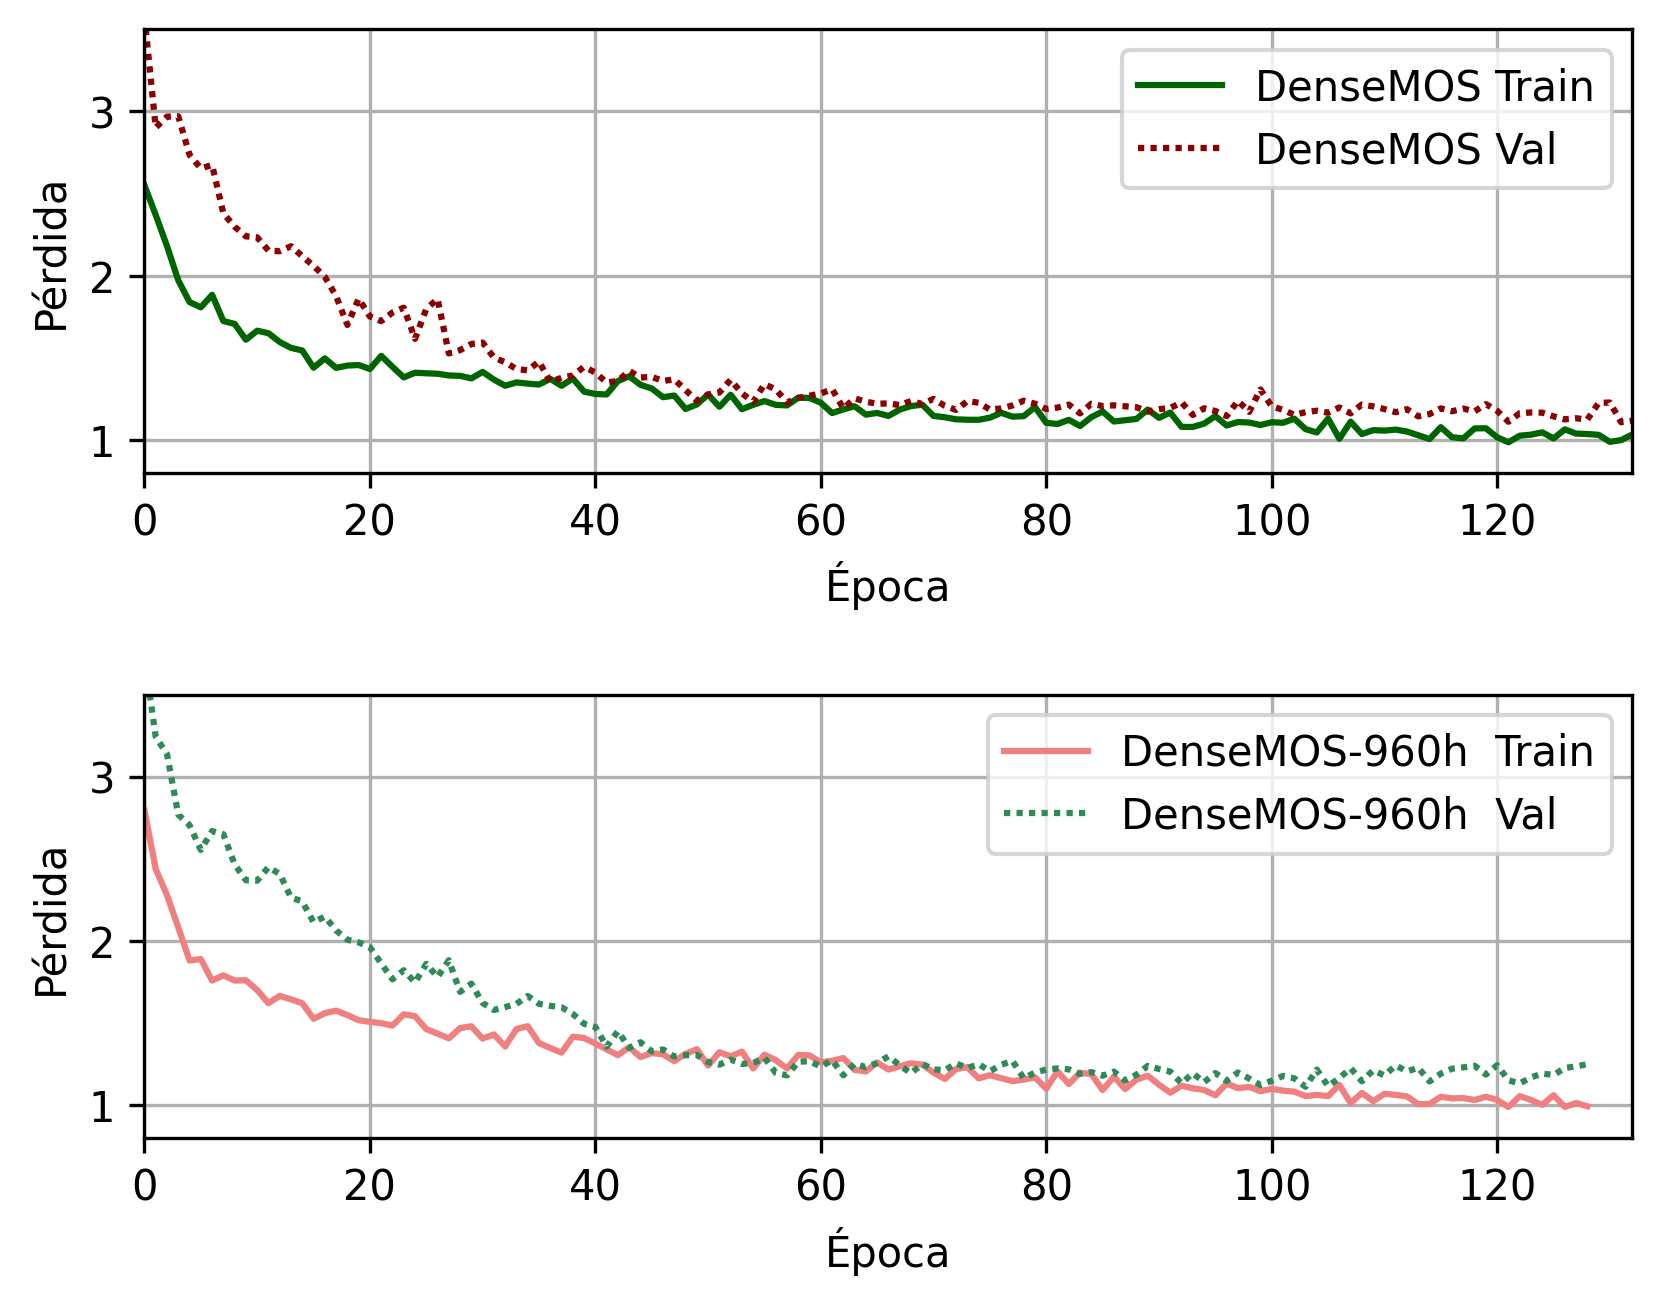

In [3]:
losses_base = pd.read_csv('losses.csv')
train_losses_base = losses_base['train_loss']
val_losses_base = losses_base['val_loss']

losses = pd.read_csv('losses_960.csv')
train_losses = losses['train_loss']
val_losses = losses['val_loss']

# combine into one plot
plt.subplot(2, 1, 2)
#increase plot size
# plt.figure(figsize=(8, 10))
plt.plot(train_losses, label='DenseMOS-960h  Train', color='lightcoral')
plt.plot(val_losses, label='DenseMOS-960h  Val', color='seagreen', linestyle=(0, (1, 1)))
#xlim
plt.xlim(0, 132)
plt.ylim(0.8, 3.5)
#grid
plt.grid()
plt.legend()
plt.xlabel('Época')
plt.ylabel('Pérdida')

# separate the subplots vertically
plt.subplots_adjust(hspace=0.5)

plt.subplot(2, 1, 1)
plt.plot(train_losses_base, label='DenseMOS Train', color="darkgreen")
# dashed line
plt.plot(val_losses_base, label='DenseMOS Val', linestyle=(0, (1, 1)), color='darkred')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.xlim(0, 132)
plt.ylim(0.8, 3.5)
# soft grid lines
plt.grid()
# show legend
plt.legend()
plt.show()

# plt.savefig('../../write-up/figuras/losses.png')

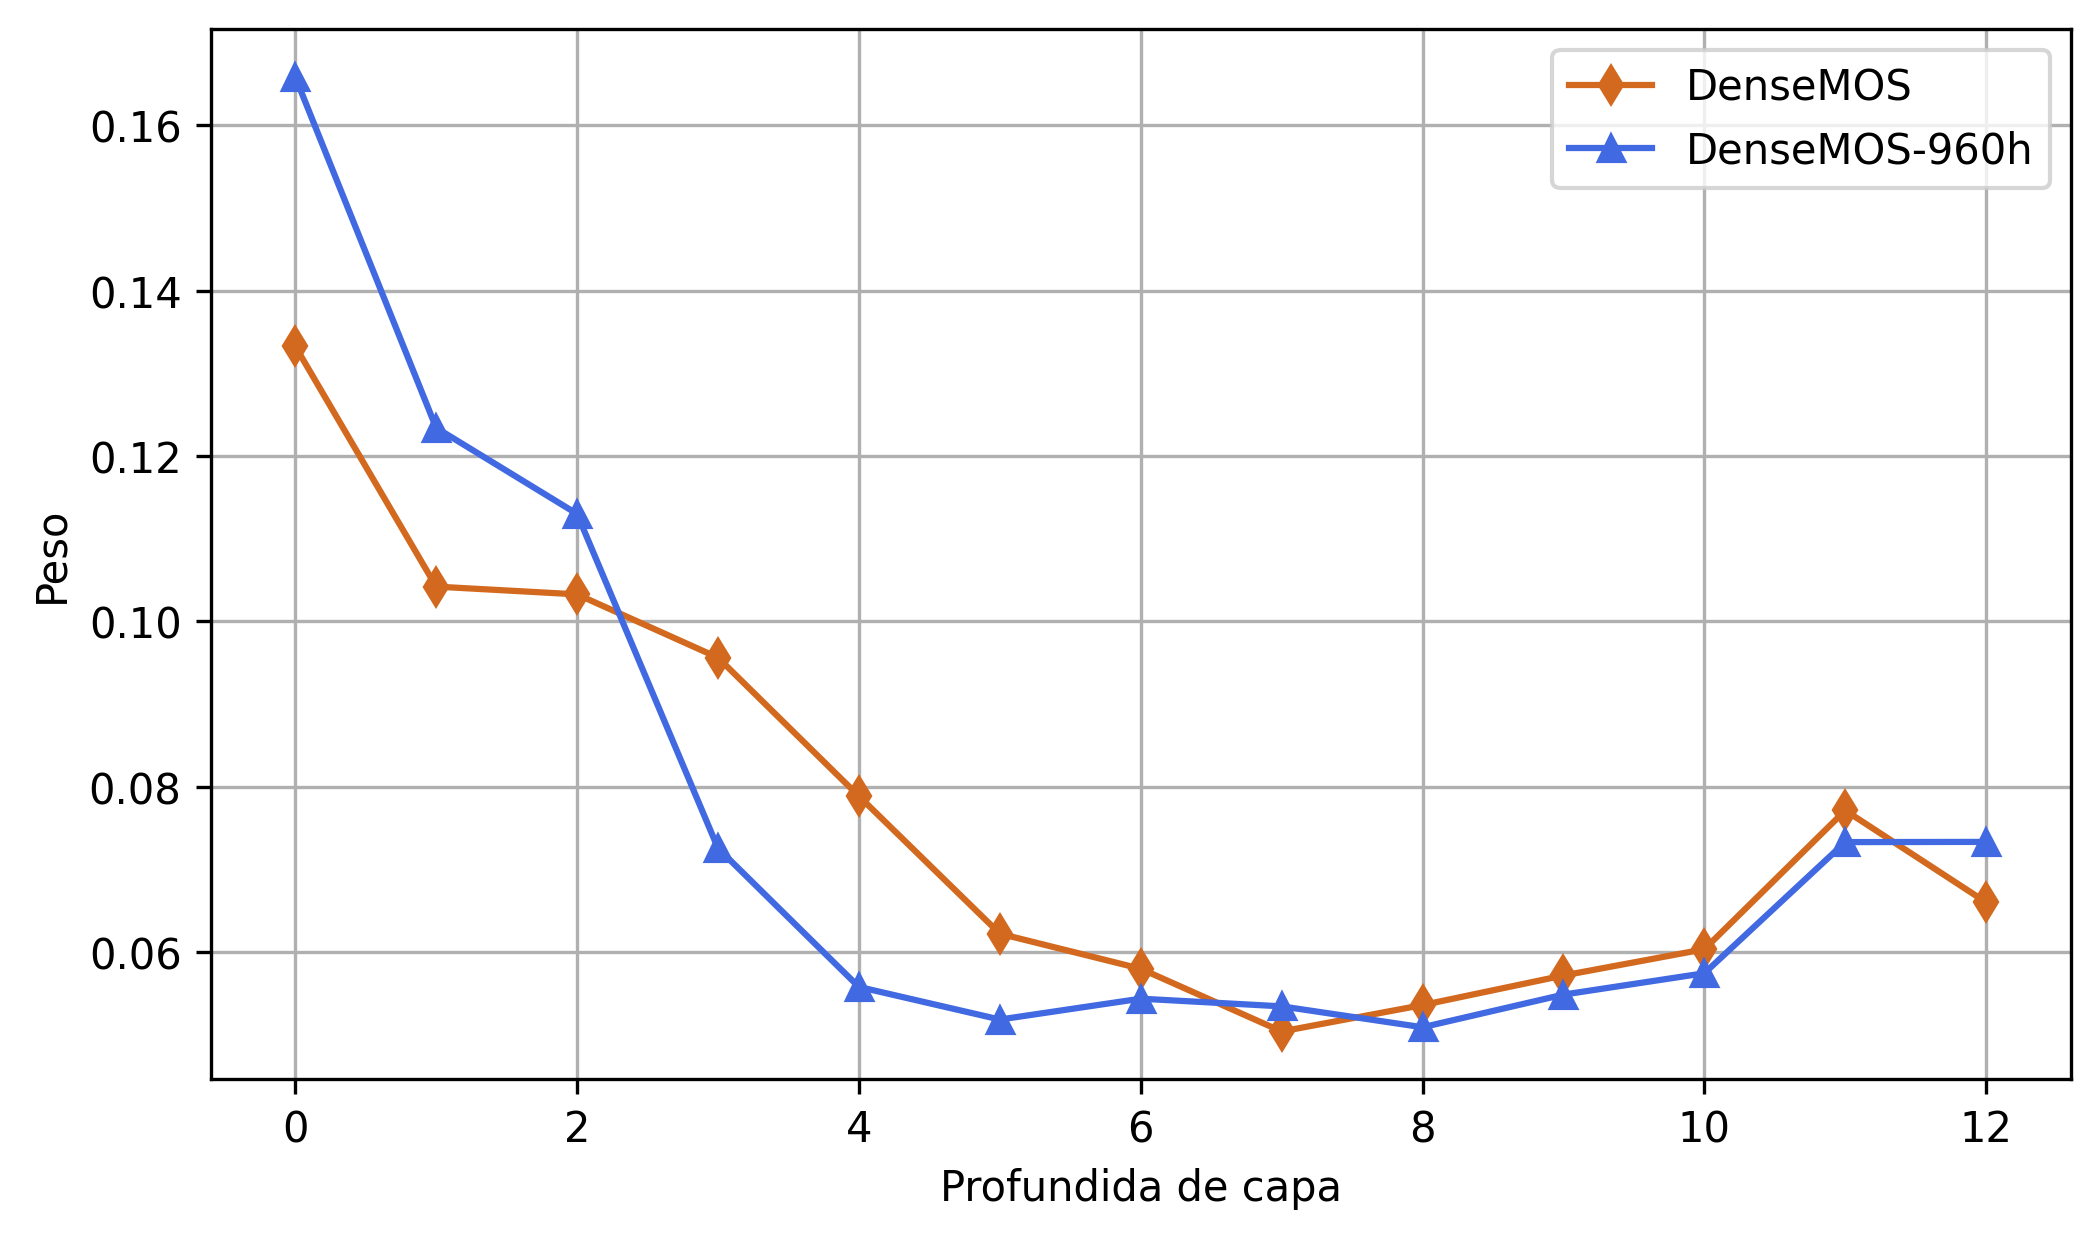

In [2]:
# read softmax weights

softmax_weights = pd.read_csv('softmax_weights.csv')
softmax_weights_960 = pd.read_csv('softmax_weights_960_2.csv')


plt.figure(figsize=(8, 10))
plt.subplot(2, 1, 1)
plt.plot(softmax_weights, label='DenseMOS', marker='d', color='chocolate')
plt.plot(softmax_weights_960, label='DenseMOS-960h', marker='^', color='royalblue')
plt.xlabel('Profundida de capa')
plt.ylabel('Peso')
plt.grid()
plt.legend()


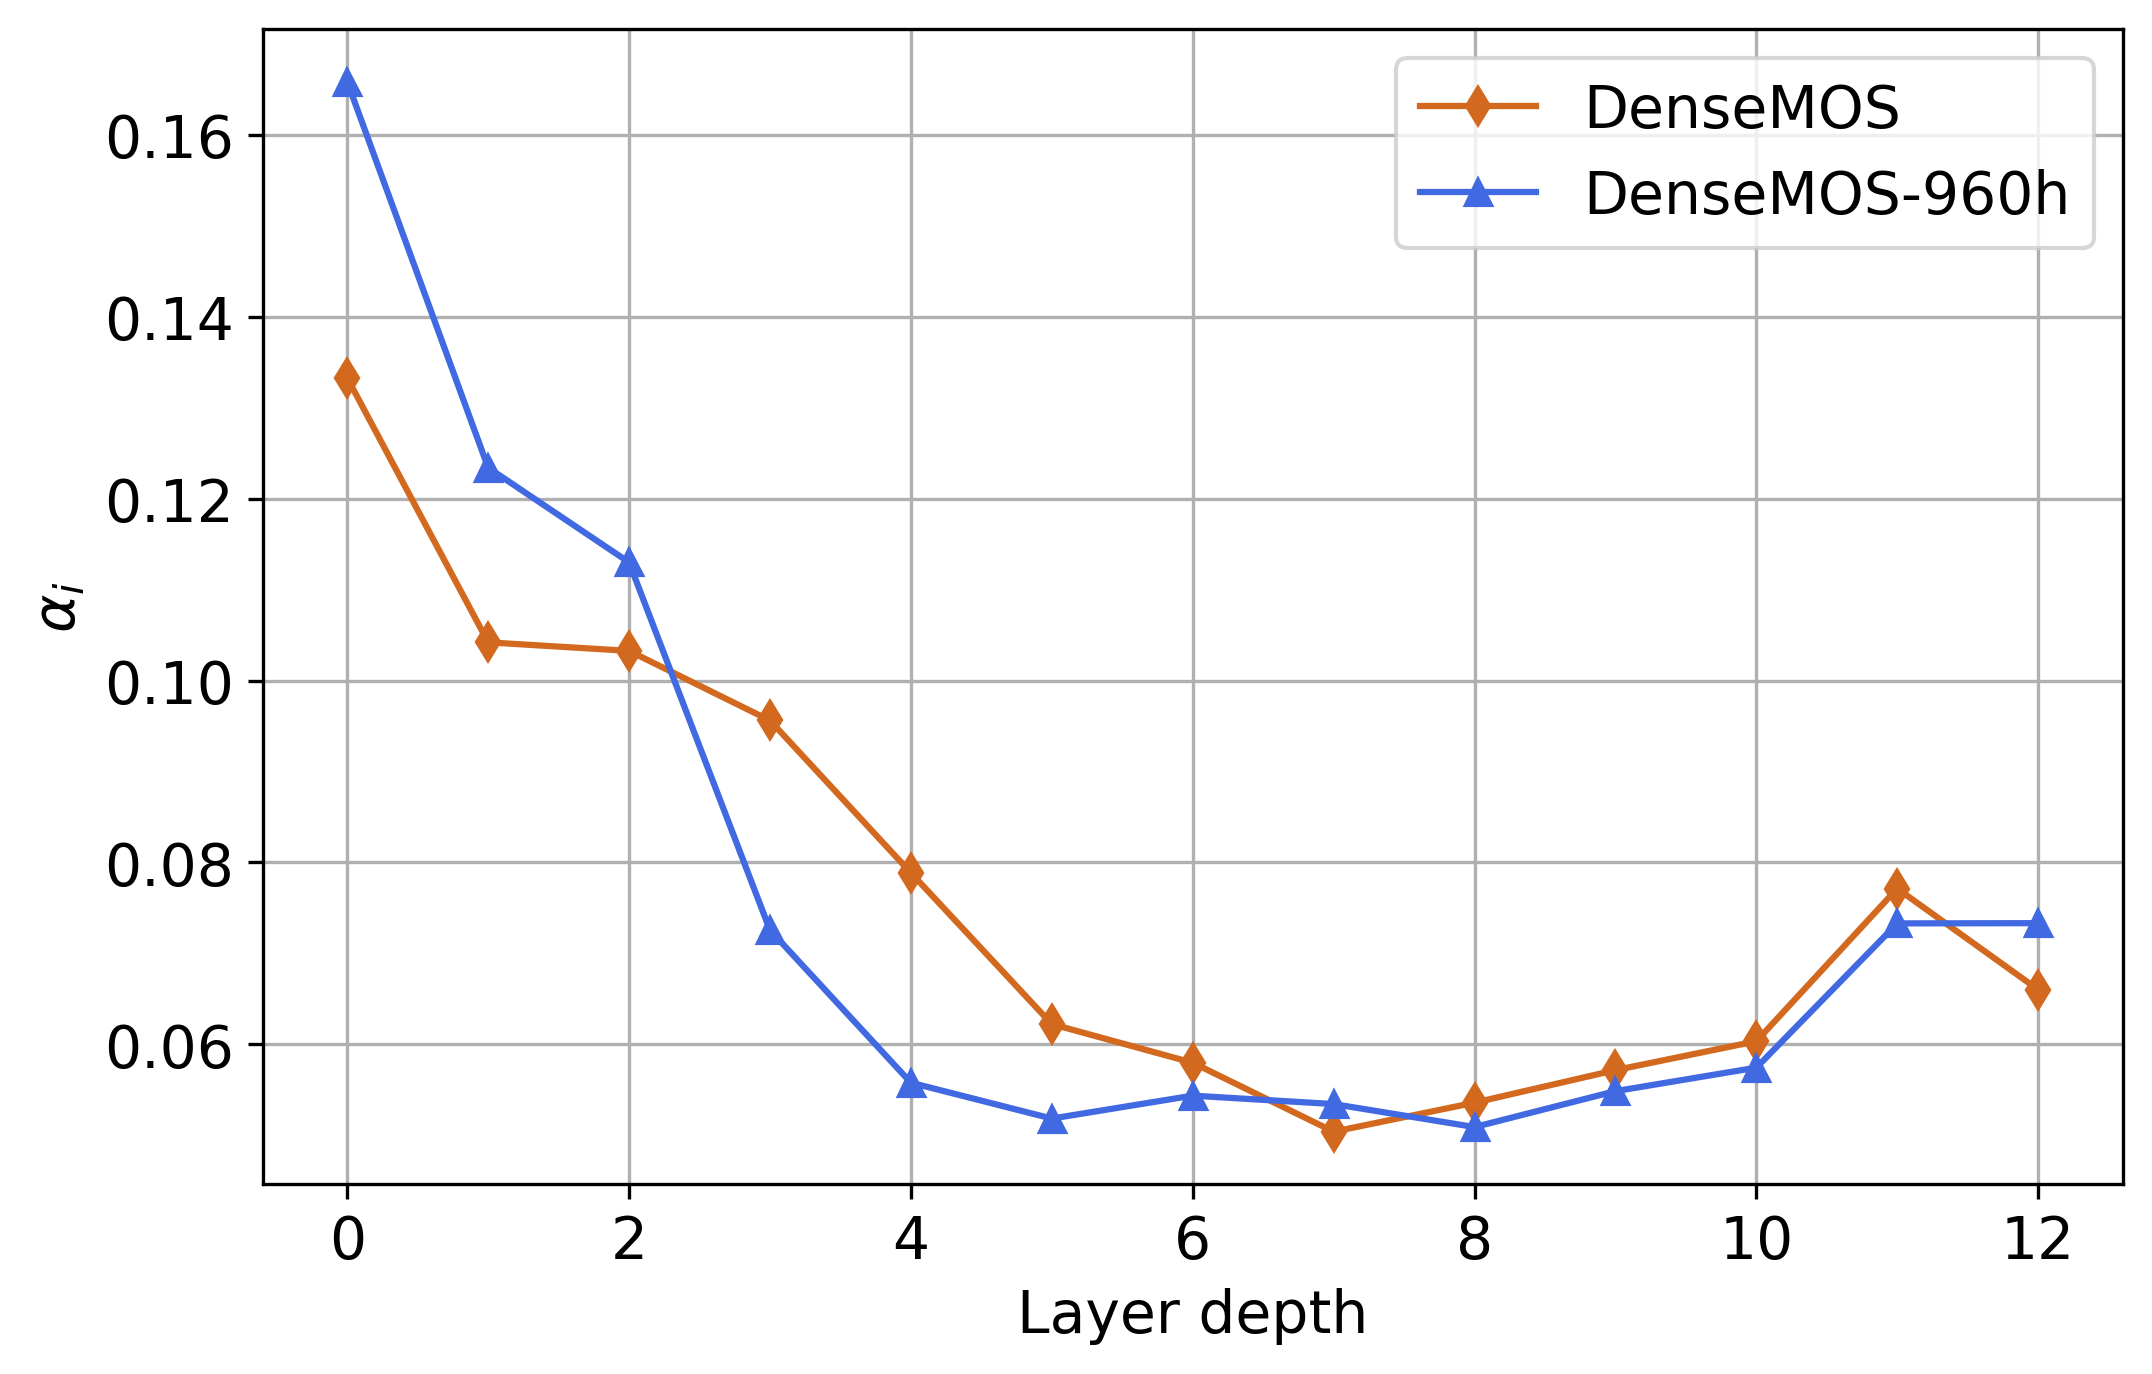

In [12]:
# English version

softmax_weights = pd.read_csv('softmax_weights.csv')
softmax_weights_960 = pd.read_csv('softmax_weights_960_2.csv')

plt.rcParams.update({'font.size': 14})  # Adjust the size as needed

plt.figure(figsize=(8, 11))
plt.subplot(2, 1, 1)
plt.plot(softmax_weights, label='DenseMOS', marker='d', color='chocolate')
plt.plot(softmax_weights_960, label='DenseMOS-960h', marker='^', color='royalblue')
plt.xlabel('Layer depth')
plt.ylabel(r'$\alpha_i$')
plt.grid()
plt.legend()


In [72]:
# combine targets and outputs into a dataframe
results = pd.read_csv("targets_outputs.csv")
# clip values between 1 and 5
results['output'] = results['output'].clip(1, 5)

results_960 = pd.read_csv("targets_outputs_960.csv")
results_960['output'] = results_960['output'].clip(1, 5)



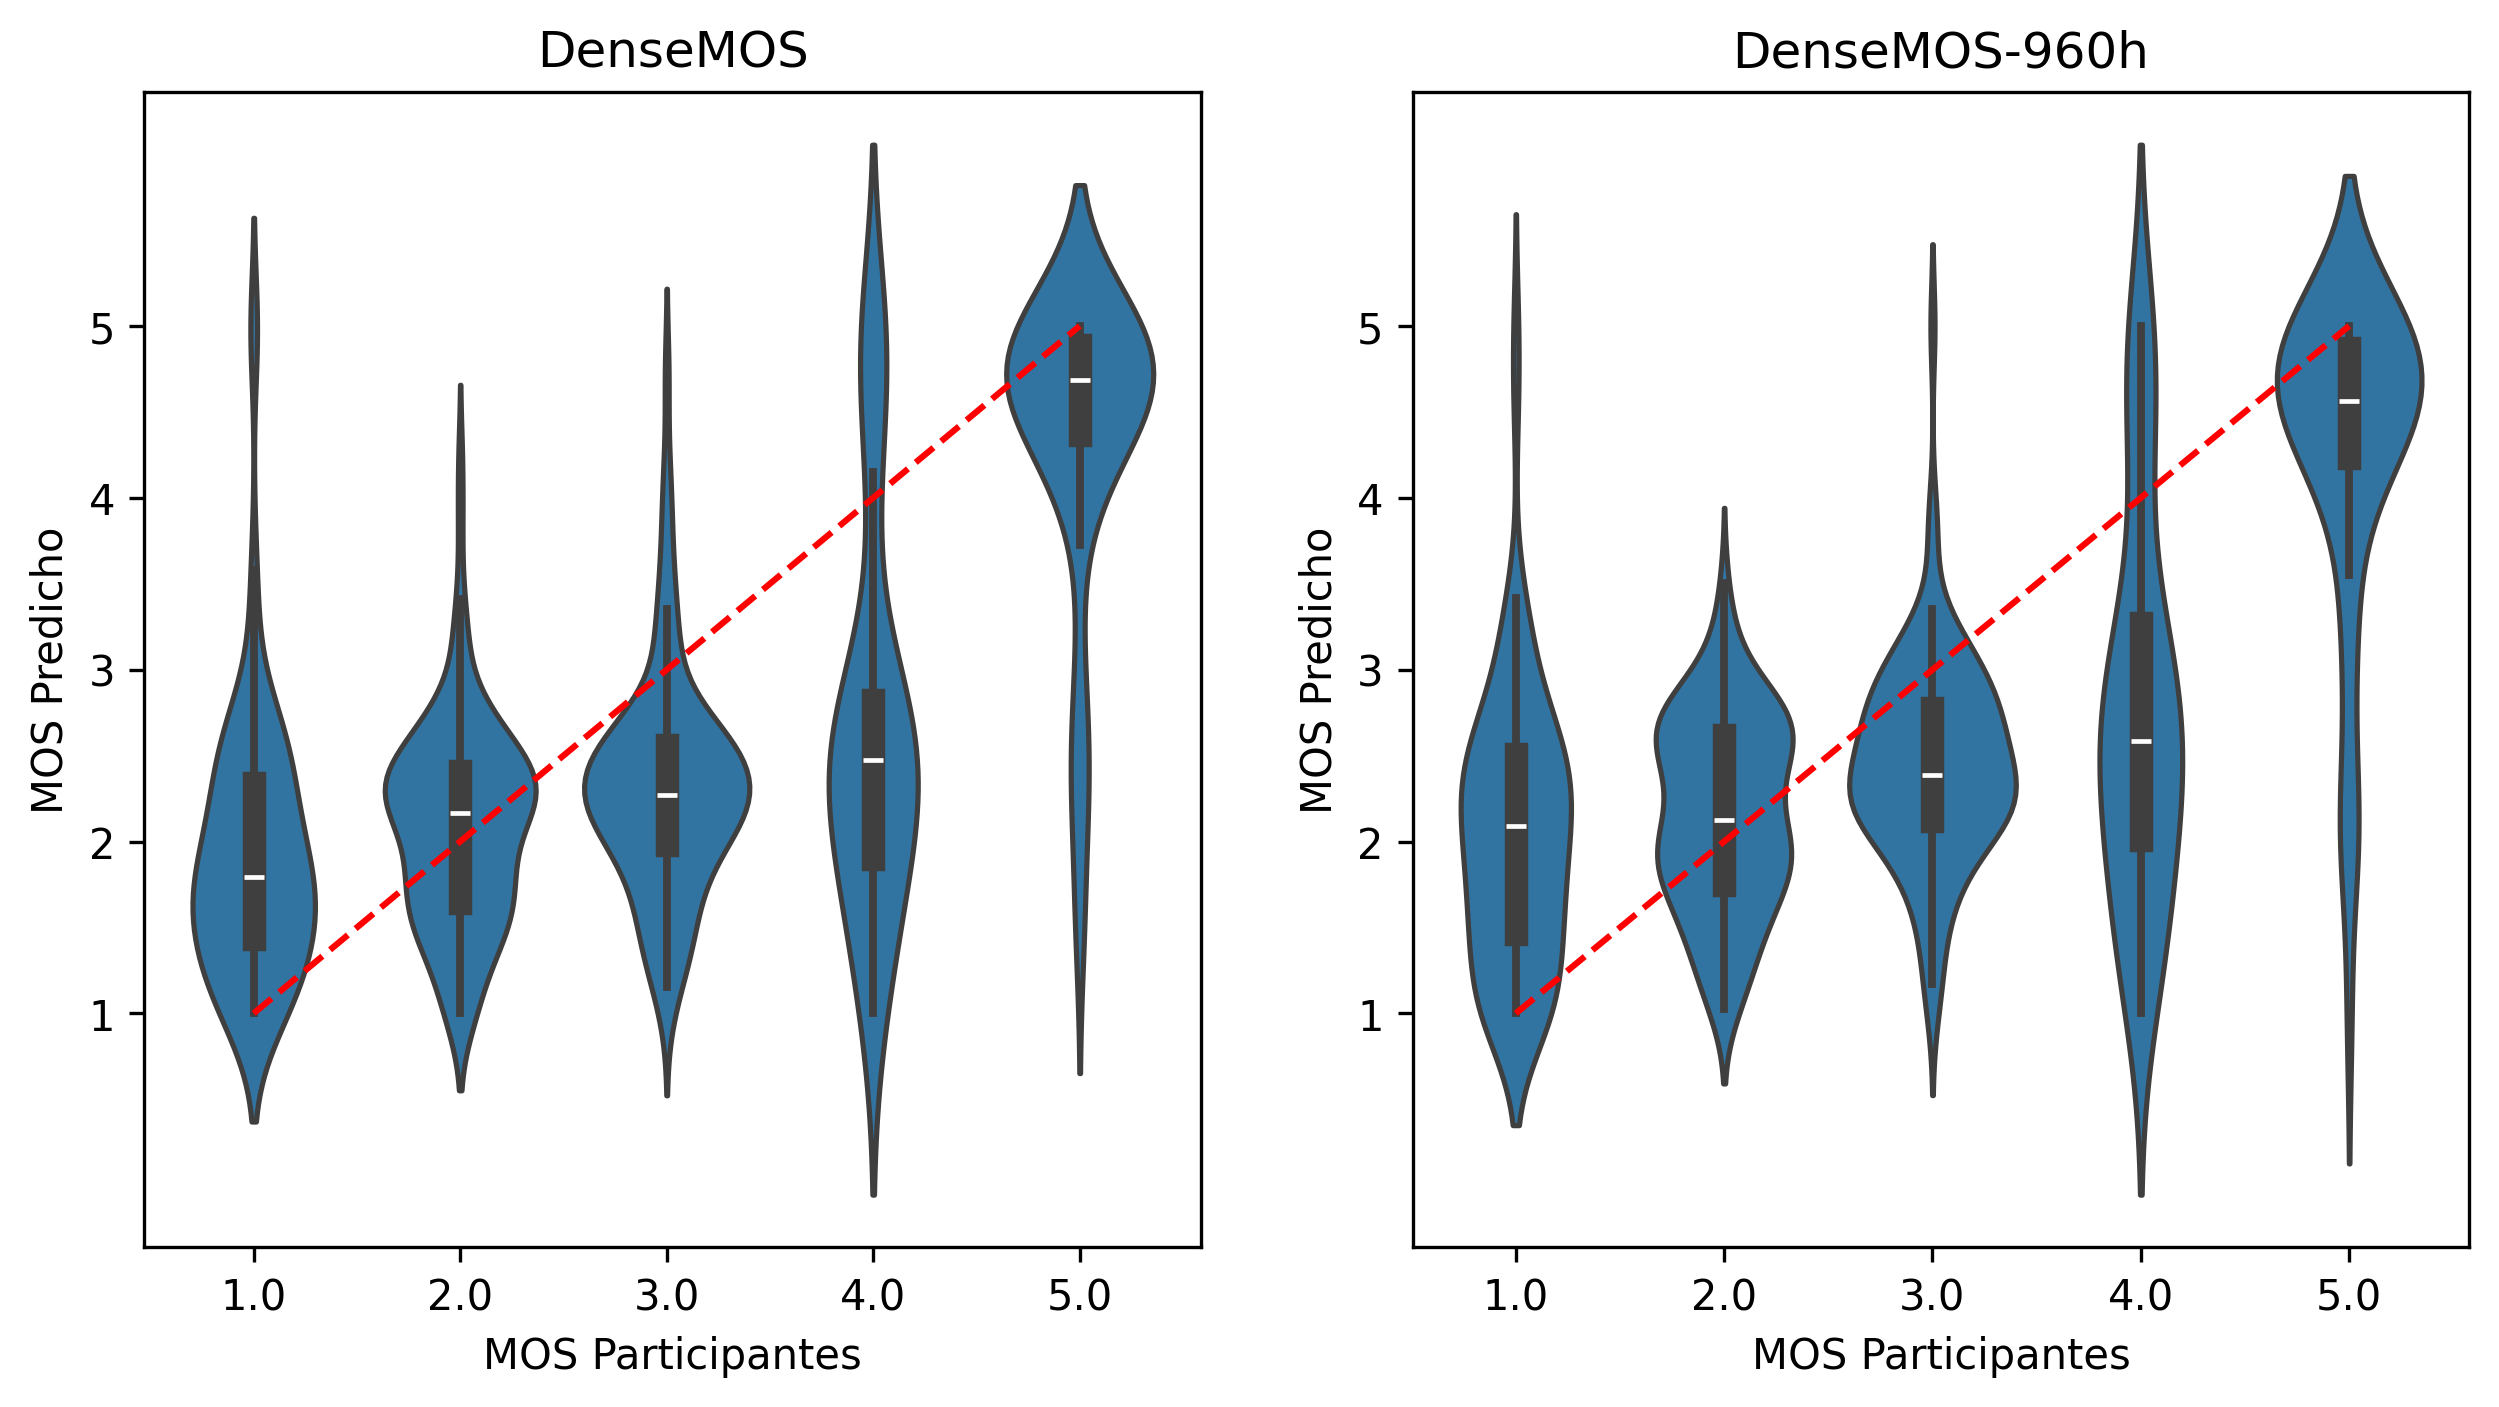

In [91]:
# violin plot of the targets and outputs
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.violinplot(x='target', y='output', data=results, ax=ax[0])
ax[0].set_title('DenseMOS')
ax[0].set_xlabel('MOS Participantes')
ax[0].set_ylabel('MOS Predicho')
ax[0].plot([0, 4], [1, 5], 'r--')
ax[0].set_yticks([1,2,3,4,5])
# set yticks

sns.violinplot(x='target', y='output', data=results_960, ax=ax[1])
ax[1].set_title('DenseMOS-960h')
ax[1].set_xlabel('MOS Participantes')
ax[1].set_ylabel('MOS Predicho')
ax[1].plot([0, 4], [1, 5], 'r--')
ax[1].set_yticks([1,2,3,4,5])


plt.show()
